In [1]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df[['RM']].values
y = df['MEDV'].values

In [2]:
from sklearn.linear_model import LinearRegression


slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)


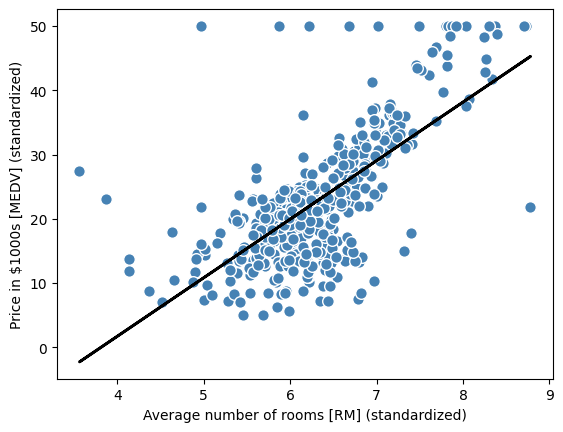

In [3]:
import matplotlib.pyplot as plt


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split


X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

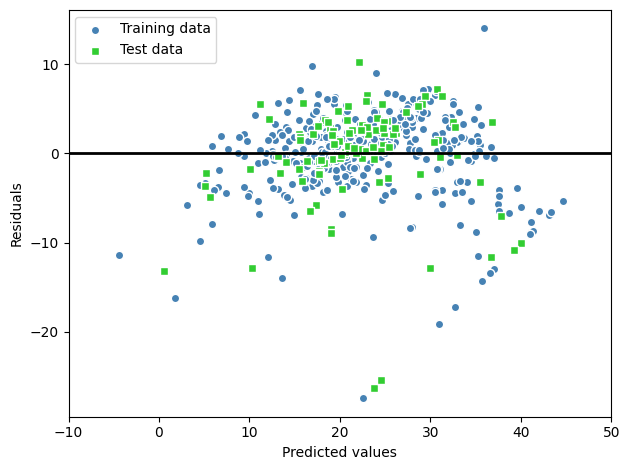

In [5]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()
# график остатков(в идеальном случае все остатки лежат на нуле)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.326, test: 33.449
R^2 train: 0.773, test: 0.589


In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elanet.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("Ridge:")
print('R^2 train: %.3f, test: %.3f\n' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("LASSO:")
print('R^2 train: %.3f, test: %.3f\n' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
print("Elastic net:")
print('R^2 train: %.3f, test: %.3f\n' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


Ridge:
R^2 train: 0.771, test: 0.580

LASSO:
R^2 train: 0.717, test: 0.488

Elastic net:
R^2 train: 0.724, test: 0.501

